In [24]:
import pandas as pd
df = pd.read_csv('hypothetical.csv')
print("First 5 rows of the dataset are\n:")
print(df.head())
print("\nMean, Median,Standard Derivation,min and max for each attribute:")
print(df.describe())
print("\nData types for each attribute:")
print(df.dtypes)

First 5 rows of the dataset are
:
   Age       Income  Education Level  Health Score  Distance to Work
0   58  49975.46050                1     76.849008         21.666447
1   71  43609.51492                1     64.470349         19.776150
2   48  69131.94873                2     77.076493          5.482868
3   34  48626.50909                2     85.599406          6.458661
4   62  64056.08780                3     56.204394         12.330952

Mean, Median,Standard Derivation,min and max for each attribute:
               Age        Income  Education Level  Health Score  \
count  1000.000000   1000.000000      1000.000000   1000.000000   
mean     50.200000  51155.824858         3.025000     75.577445   
std      17.372905  15882.096668         1.417881      9.971996   
min      20.000000   8230.465328         1.000000     41.131862   
25%      36.000000  40659.182135         2.000000     68.709145   
50%      51.000000  50976.922295         3.000000     76.038680   
75%      66.00000

In [27]:
import pandas as pd
df = pd.read_csv('hypothetical.csv')
missing_values = df.isnull().sum()
print("\nMissing values in columns:")
print(missing_values)
df_filled = df.fillna(df.mean())
df['Education Level'] = df['Education Level'].astype('category')
print("\nNew DataFrame:\n")
print(df_filled.head())


Missing values in columns:
Age                 0
Income              0
Education Level     0
Health Score        0
Distance to Work    0
dtype: int64

New DataFrame:

   Age       Income Education Level  Health Score  Distance to Work
0   58  49975.46050               1     76.849008         21.666447
1   71  43609.51492               1     64.470349         19.776150
2   48  69131.94873               2     77.076493          5.482868
3   34  48626.50909               2     85.599406          6.458661
4   62  64056.08780               3     56.204394         12.330952


C:\Users\Abdul Hanan\AppData\Local\Temp\ipykernel_7344\2329648591.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled = df.fillna(df.mean())


C:\Users\Abdul Hanan\AppData\Local\Temp\ipykernel_7344\102540617.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()



Correlation matrix:
                       Age    Income  Education Level  Health Score  \
Age               1.000000 -0.007988        -0.006746      0.011111   
Income           -0.007988  1.000000         0.004820     -0.014344   
Education Level  -0.006746  0.004820         1.000000     -0.046613   
Health Score      0.011111 -0.014344        -0.046613      1.000000   
Distance to Work  0.019345  0.005691        -0.037663      0.007367   

                  Distance to Work  
Age                       0.019345  
Income                    0.005691  
Education Level          -0.037663  
Health Score              0.007367  
Distance to Work          1.000000  


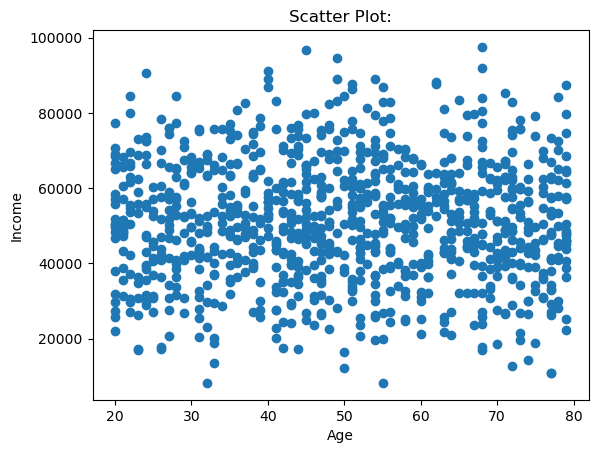

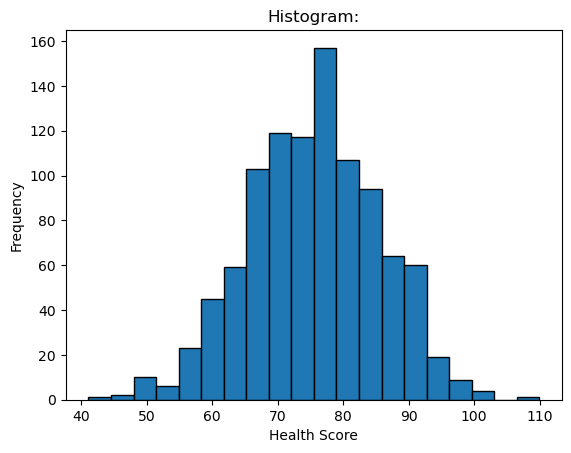


Average Health Scores:
Age Group
18 to 30    75.174237
31 to 38    75.592589
39 to 47    76.189608
48 to 57    74.952891
58 to 65    75.927958
66 to 70    75.748421
Name: Health Score, dtype: float64

Average Income :
Age Group
18 to 30    50304.355275
31 to 38    50875.081409
39 to 47    51665.902865
48 to 57    52901.360569
58 to 65    51046.432258
66 to 70    50281.618418
Name: Income, dtype: float64


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
correlation_matrix = df.corr()
print("\nCorrelation matrix:")
print(correlation_matrix)
plt.scatter(df['Age'], df['Income'])
plt.title('Scatter Plot:')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()
plt.hist(df['Health Score'], bins=20, edgecolor='black')
plt.title('Histogram:')
plt.xlabel('Health Score')
plt.ylabel('Frequency')
plt.show()
age_bins = [18, 29, 37, 46, 56, 64, 100]
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=['18 to 30', '31 to 38', '39 to 47', '48 to 57', '58 to 65', '66 to 70'])
average_health_scores = df.groupby('Age Group')['Health Score'].mean()
average_income_levels = df.groupby('Age Group')['Income'].mean()
print("\nAverage Health Scores:")
print(average_health_scores)
print("\nAverage Income :")
print(average_income_levels)

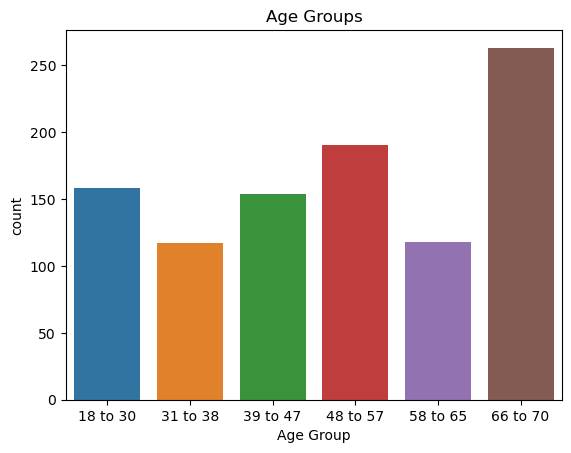

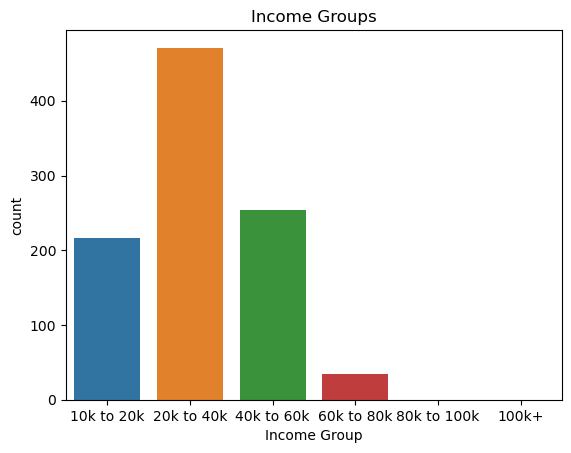

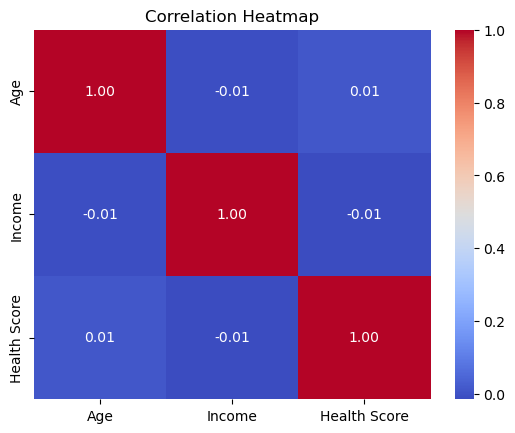

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('hypothetical.csv')
age_bins = [18, 29, 37, 46, 56, 64, 100]
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=['18 to 30', '31 to 38', '39 to 47', '48 to 57', '58 to 65', '66 to 70'])
income_bins = [20000, 40000, 60000, 80000, 100000, 150000, float('inf')]
df['Income Group'] = pd.cut(df['Income'], bins=income_bins, labels=['10k to 20k', '20k to 40k', '40k to 60k', '60k to 80k', '80k to 100k', '100k+'])
sns.countplot(x='Age Group', data=df)
plt.title('Age Groups')
plt.show()
sns.countplot(x='Income Group', data=df)
plt.title('Income Groups')
plt.show()
correlation_matrix = df[['Age', 'Income', 'Health Score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

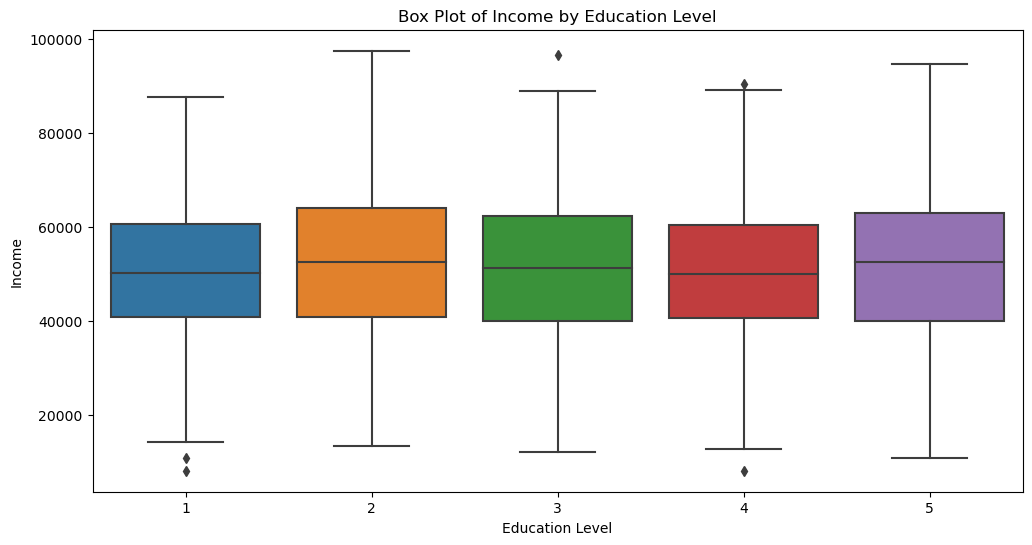

ANOVA results:
F-statistic: 0.1953193206611334
P-value: 0.9999999999999999


In [38]:
import pandas as pd
import seaborn as sns
from scipy.stats import f_oneway
df = pd.read_csv('hypothetical.csv')
plt.figure(figsize=(12, 6))
sns.boxplot(x='Education Level', y='Income', data=df)
plt.title('Box Plot of Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Income')
plt.show()
result_anova = f_oneway(*(df['Income'][df['Education Level'] == edu] for edu in df['Education Level']))
print("ANOVA results:")
print("F-statistic:", result_anova.statistic)
print("P-value:", result_anova.pvalue)

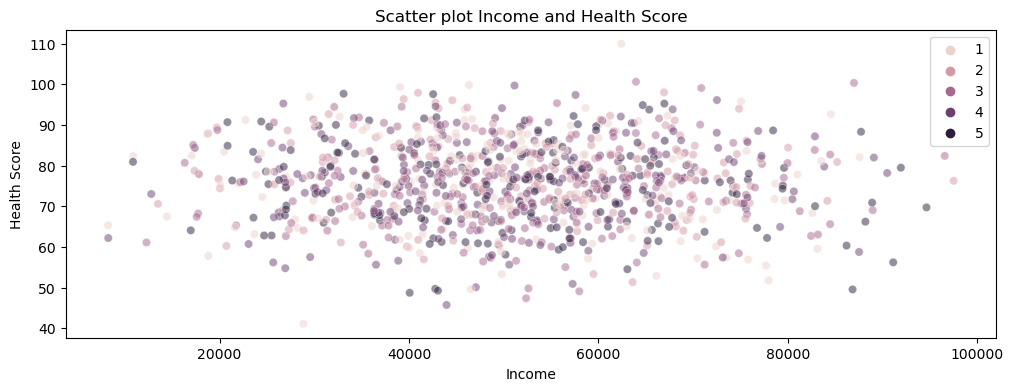

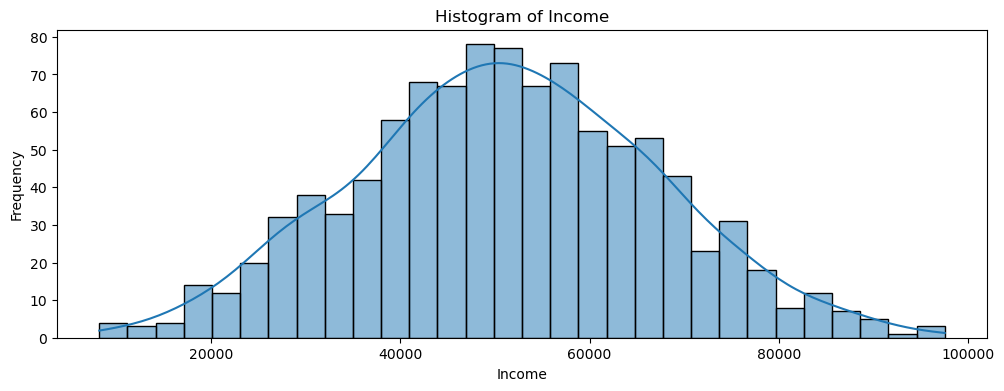

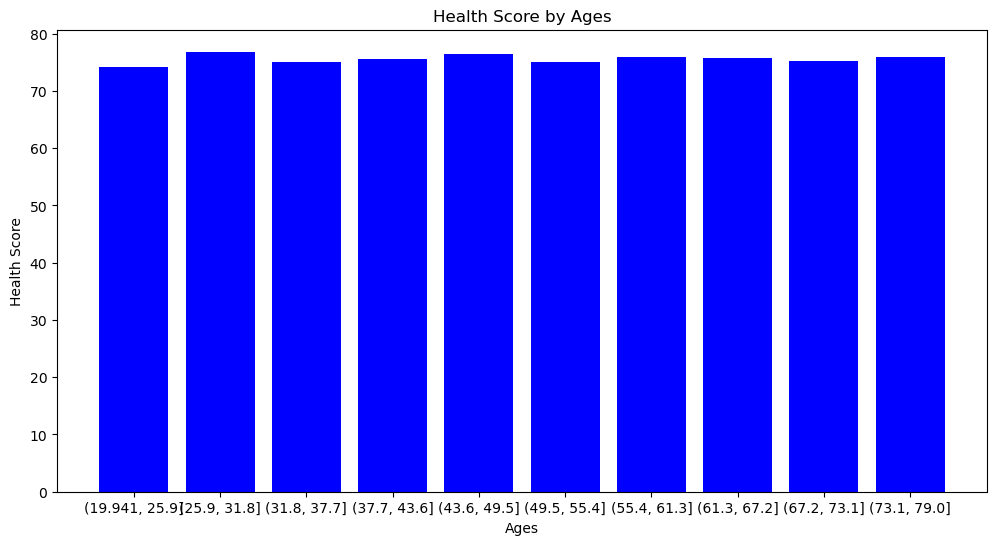

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('hypothetical.csv')
plt.figure(figsize=(12, 4))
sns.scatterplot(x='Income', y='Health Score', data=df, alpha=0.5, hue='Education Level')
plt.title('Scatter plot Income and Health Score')
plt.xlabel('Income')
plt.ylabel('Health Score')
plt.legend()
plt.show()
plt.figure(figsize=(12, 4))
sns.histplot(x='Income', data=df, bins=30, kde=True)
plt.title('Histogram of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()
df['Age'] = pd.cut(df['Age'], bins=10)
grouping_age = df.groupby('Age')['Health Score'].mean()
plt.figure(figsize=(12, 6))
plt.bar(grouping_age.index.astype(str), grouping_age, color='blue')
plt.title('Health Score by Ages')
plt.xlabel('Ages')
plt.ylabel('Health Score')
plt.show()
